<a href="https://colab.research.google.com/github/otwn/Data-Science-Review/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression**


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model


In [ ]:
oecd_bli = pd.read_csv("https://raw.githubusercontent.com/otwn/Data-Science-Review/master/data/oecd_betterlifeindex40.csv",
                       thousands=",")

In [ ]:
print(len(oecd_bli))
oecd_bli.head()

40


,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,Quality of support network,Educational attainment,Student skills,Years in education,Air pollution,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
0,Australia,..,20,..,32759,427064,5.4,73,1.31,49126,95,81,502,21,5,93,2.7,91,82.5,85,7.3,63.5,1.1,13.04,14.35
1,Austria,0.9,21,1.6,33541,308325,3.5,72,1.84,50349,92,85,492,17,16,92,1.3,80,81.7,70,7.1,80.6,0.5,6.66,14.55
2,Belgium,1.9,21,2.2,30364,386006,3.7,63,3.54,49675,91,77,503,19.3,15,84,2,89,81.5,74,6.9,70.1,1.0,4.75,15.7
3,Canada,0.2,22,2.6,30854,423849,6,73,0.77,47622,93,91,523,17.3,7,91,2.9,68,81.9,88,7.4,82.2,1.3,3.69,14.56
4,Chile,9.4,18,1.2,..,100967,8.7,63,..,25879,85,65,443,17.5,16,71,1.3,47,79.9,57,6.5,47.9,4.2,9.72,..


In [ ]:
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              40 non-null     object 
 1     Dwellings without basic facilities                 40 non-null     object 
 2     Housing expenditure                                40 non-null     object 
 3     Rooms per person                                   40 non-null     object 
 4     Household net adjusted disposable income           40 non-null     object 
 5     Household net wealth                               40 non-null     object 
 6     Labour market insecurity                           40 non-null     object 
 7     Employment rate                                    40 non-null     int64  
 8     Long-term unemployment rate                        40 non-null     obj

In [ ]:
gdp_capita = pd.read_csv("https://raw.githubusercontent.com/otwn/Data-Science-Review/master/data/WEO_Data.csv", 
                         thousands=',', na_values="n/a")

In [ ]:
print(len(gdp_capita))
gdp_capita.head()

191


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.380,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.140,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.320,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.300,2011.0


In [ ]:
gdp_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        190 non-null    object 
 1   Subject Descriptor             189 non-null    object 
 2   Units                          189 non-null    object 
 3   Scale                          189 non-null    object 
 4   Country/Series-specific Notes  188 non-null    object 
 5   2015                           187 non-null    float64
 6   Estimates Start After          188 non-null    float64
dtypes: float64(2), object(5)
memory usage: 10.6+ KB


In [ ]:
gdp_capita = gdp_capita[["Country", "2015"]]
gdp_capita.rename(columns={"2015":"GDP per capita"}, inplace=True)
gdp_capita.head()

,Country,GDP per capita
0,Afghanistan,599.994
1,Albania,3995.380
2,Algeria,4318.140
3,Angola,4100.320
4,Antigua and Barbuda,14414.300


In [ ]:
hp = lsi.join(gdp_capita.set_index('Country'), on='Country')

In [ ]:
hp.tail()

,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,Quality of support network,Educational attainment,Student skills,Years in education,Air pollution,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care,GDP per capita
35,United Kingdom,0.3,26,1.9,28715,548392,4.5,75,1.13,43732,94,81,500,17.5,11,84,3.1,69,81.2,69,6.8,77.7,0.2,12.15,14.92,43770.69
36,United States,0.1,19,2.4,45284,632100,7.7,70,0.66,60558,91,91,488,17.2,10,83,3.1,65,78.6,88,6.9,73.9,5.5,11.09,14.44,55805.20
37,Brazil,6.7,..,..,..,..,..,61,..,..,90,49,395,16.2,10,73,2.2,79,74.8,..,6.4,35.6,26.7,7.13,..,8670.00
38,Russia,14.8,18,0.9,..,..,..,70,1.59,..,89,94,492,16.2,15,55,..,68,71.8,43,5.8,52.8,9.6,0.14,..,9054.91
39,South Africa,37,18,..,..,..,..,43,16.46,..,88,73,..,..,22,67,..,73,57.5,..,4.7,36.1,13.7,18.12,14.92,5694.57


In [ ]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 26 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              40 non-null     object 
 1     Dwellings without basic facilities                 40 non-null     object 
 2     Housing expenditure                                40 non-null     object 
 3     Rooms per person                                   40 non-null     object 
 4     Household net adjusted disposable income           40 non-null     object 
 5     Household net wealth                               40 non-null     object 
 6     Labour market insecurity                           40 non-null     object 
 7     Employment rate                                    40 non-null     int64  
 8     Long-term unemployment rate                        40 non-null     obj

In [ ]:
hp2 = hp[["Country", "GDP per capita", "  Life satisfaction"]].sort_values(by="  Life satisfaction",
                                                                     ascending=False)

In [ ]:
print(hp2)

            Country  GDP per capita    Life satisfaction
9           Finland        41973.99                  7.6
26           Norway        74822.11                  7.6
7           Denmark        52114.17                  7.6
14          Iceland        50854.58                  7.5
33      Switzerland        80675.31                  7.5
3            Canada        43331.96                  7.4
24      Netherlands        43603.12                  7.4
25      New Zealand        37044.89                  7.3
32           Sweden        49866.27                  7.3
0         Australia        50961.87                  7.3
16           Israel        35343.34                  7.2
1           Austria        43724.03                  7.1
15          Ireland        51350.74                  7.0
11          Germany        40996.51                  7.0
22       Luxembourg       101994.09                  6.9
36    United States        55805.20                  6.9
2           Belgium        4010

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

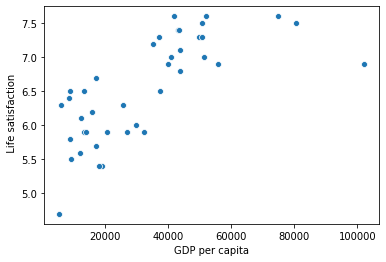

In [ ]:
sns.scatterplot(data=hp2, x="GDP per capita", y="  Life satisfaction")

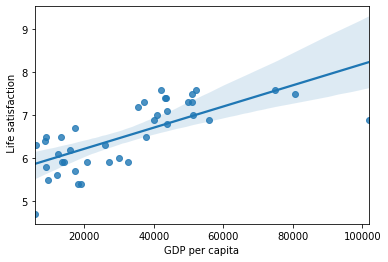

In [ ]:
sns.regplot(data=hp2, x="GDP per capita", y="  Life satisfaction")

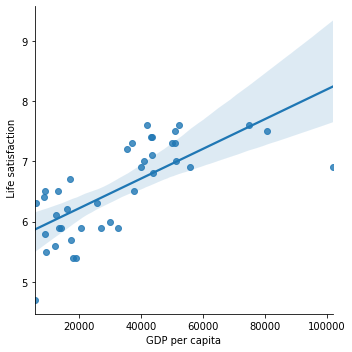

In [ ]:
sns.lmplot(data=hp2, x="GDP per capita", y="  Life satisfaction")

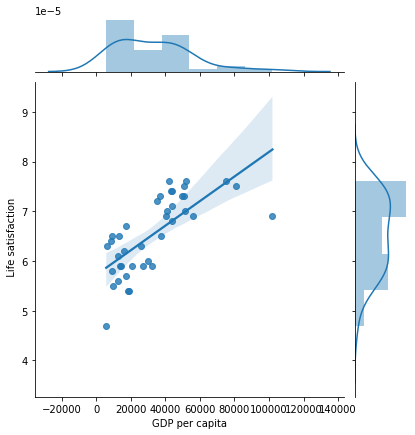

In [ ]:
sns.jointplot(data=hp2, x="GDP per capita", y="  Life satisfaction", kind="reg")

# Another Example with Random dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [11]:
def generate_examples(num=1000):
  W = [1.0, -3.0]
  b = np.random.randn()

  W = np.reshape(W, (2, 1))
  X = np.random.randn(num, 2)
  y = b + np.dot(X, W)  # (1000, 2).*(2,1)=(1000,1)
  y = np.reshape(y, (num, 1))

  return X, y

In [3]:
X, y = generate_examples()

In [4]:
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [5]:
print(X[0], y[0])

[-0.26409022  0.5698369 ] [-0.97360093]


## Initialize Parameters

The loss over m examples

$J = \frac{1}{2m} \sum(y - \hat{y})^{2}$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to min(J)

In [6]:
class Model:
  def __init__(self, num_features):
    self.num_features = num_features
    self.W = np.random.randn(num_features, 1)
    self.b = np.random.randn()

In [9]:
model = Model(3)
print(model.W)
print(model.b)

[[ 0.89299202]
 [ 1.30016056]
 [-0.09142546]]
0.31753738486715355


## Simple Algorith for gradient descent

The gradient descent algorithm can be simplified in 4 steps:


1.   Get predictions y_hat for X with current values of W and b
2.   Compute the loss between y and y_hat
3.   Find gradients of the loss with respect to parameters W and b
4.   Update the values of W and b by subtracting the gradient values obtained in the previous step


## Forward Pass

The gradients of loss with respect to w:

$$\frac{dJ}{dw} = \frac{\delta J}{\delta w} = \lim_{e \to 0}\frac{J(w + \epsilon) - J(w)}{\epsilon} $$

In [12]:
class Model(Model):
  def forward_pass(self, X):
    y_hat = self.b + np.dot(X, self.W)
    return y_hat

In [14]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape, y_hat[0])

(1000, 1) [-1.24998517]


## Compute Loss


In [15]:
class Model(Model):
  def compute_loss(self, y_hat, y_true):
    return np.sum(np.square(y_hat - y_true))/(2 * y_hat.shape[0])
    

In [17]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)

In [18]:
loss

8.617943820008081

## Backward Pass

Find gradient
The gradient of loss with respect to bias can be calculated with:

$ \frac{dJ}{dW_{j}} = \frac{1}{m} \sum^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)})x^{(i)}_{j} $

$ \frac{dJ}{db} = \frac{1}{m} \sum^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)}) $

In [19]:
class Model(Model):
  def backward_pass(self, X, y_true, y_hat):
    m = y_hat.shape[0]
    dW = (1/m)*np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)
    db = (1/m)*np.sum(y_hat - y_true)
    return dW, db

In [20]:
model = Model(2)
X, y = generate_examples()
y_hat = model.forward_pass(X)

dW, db = model.backward_pass(X, y, y_hat)

In [21]:
print(dW, db)

[-1.90715541  3.62825174] -0.10472857056990856


## Update Parameters

In [24]:
class Model(Model):
  def update_params(self, dW, db, lr):
    self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
    self.b = self.b - lr * db

## Training Loop

In [29]:
class Model(Model):
  def train(self, x_train, y_train, iterations, lr):
    losses = []
    for i in range(0, iterations):
      y_hat = self.forward_pass(x_train)
      loss = self.compute_loss(y_hat, y_train)
      dW, db = self.backward_pass(x_train, y_train, y_hat)
      self.update_params(dW, db, lr)
      losses.append(loss)
      if i%int(iterations/10) == 0:
        print('Iter: {}, Loss: {:.4f}'.format(i, loss))
    return losses

In [30]:
model = Model(2)

In [31]:
x_train, y_train = generate_examples()

In [32]:
losses = model.train(x_train, y_train, 1000, 3e-3)

Iter: 0, Loss: 6.4100
Iter: 100, Loss: 3.6050
Iter: 200, Loss: 2.0281
Iter: 300, Loss: 1.1413
Iter: 400, Loss: 0.6425
Iter: 500, Loss: 0.3618
Iter: 600, Loss: 0.2038
Iter: 700, Loss: 0.1148
Iter: 800, Loss: 0.0647
Iter: 900, Loss: 0.0365


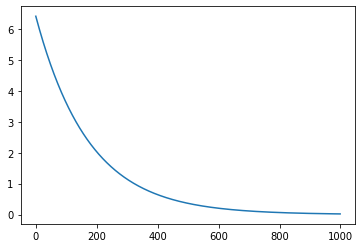

In [33]:
plt.plot(losses);

## Predictions

In [43]:
model_untrained = Model(2)

x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [44]:
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

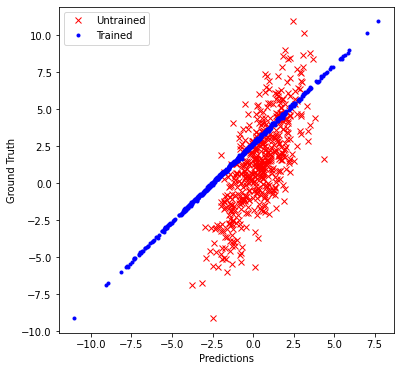

In [45]:
plt.figure(figsize=(6,6))
plt.plot(preds_untrained, y_test, 'rx', label='Untrained')
plt.plot(preds_trained, y_test, 'b.', label='Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()

## Wrap up all

In [54]:
import numpy as np

class LinearModel:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()
        
    def forward_pass(self, X):
        y = self.b + np.dot(X, self.W)
        return y
    
    def compute_loss(self, y, y_true):
        loss = np.sum(np.square(y - y_true))
        return loss/(2*y.shape[0])
    
    def backward_pass(self, X, y_true, y_hat):
        m = y_hat.shape[0]
        db = np.sum(y_hat - y_true)/m
        dW = np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)/m
        return dW, db
    
    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - lr * db
        
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(iterations):
            y_hat = self.forward_pass(x_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            loss = self.compute_loss(y_hat, y_train)
            losses.append(loss)
            if i % int(iterations/10) == 0:
                print('Iter: {}, Current loss: {:.4f}'.format(i, loss))
        return losses


# Another Example with Previous Model

In [48]:
%%time
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CPU times: user 664 µs, sys: 0 ns, total: 664 µs
Wall time: 671 µs


In [51]:
df = pd.read_excel("https://github.com/otwn/Data-Science-Review/blob/master/data/chirps.xls?raw=true")

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [52]:
df.head()

,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


In [53]:
x = df.X.values
y = df.Y.values
x = np.reshape(x, (x.shape[0], 1))
y = np.reshape(y, (y.shape[0], 1))

In [55]:
model = LinearModel(1)

losses = model.train(
    x, y,
    200, 0.0001
)

Iter: 0, Current loss: 5284.7399
Iter: 20, Current loss: 1696.2104
Iter: 40, Current loss: 548.7696
Iter: 60, Current loss: 181.8726
Iter: 80, Current loss: 64.5564
Iter: 100, Current loss: 27.0441
Iter: 120, Current loss: 15.0494
Iter: 140, Current loss: 11.2140
Iter: 160, Current loss: 9.9876
Iter: 180, Current loss: 9.5953


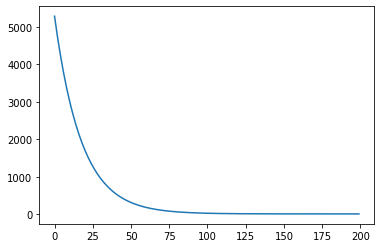

In [56]:
plt.plot(losses)

In [57]:
y_preds = model.forward_pass(x)

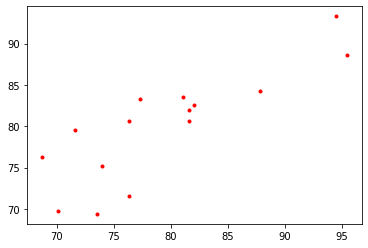

In [60]:
plt.plot(y_preds, y, 'r.')

In [61]:
print(model.W, model.b)

[[4.76773159]] 0.0574988485713751


# Another Example 


In [63]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [66]:
data = data = pd.read_csv("https://raw.githubusercontent.com/otwn/Data-Science-Review/master/data/food_truck_data.txt")

In [68]:
data.head()
# Population of city: unit of 10,000 => 6.1101 = 61,101
# Profit: unit of 10,000 

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


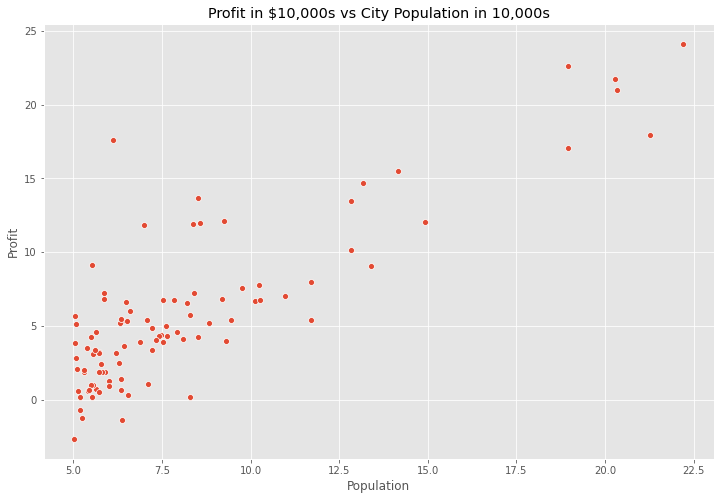

In [71]:
ax = sns.scatterplot(x="Population", y="Profit", data=data)
ax.set_title("Profit in $10,000s vs City Population in 10,000s");

## Compute the cost $J(\theta)$

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum^{m}_{i=1} (h_{\theta}(x^{(i)}) - y^{(i)})^{2} $$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$ h_{\theta}(x) = \theta^{T} x = \theta_{0} + \theta_{1}x_{1} $$





In [73]:
def cost_function(X, y, theta):
  m = len(y)
  y_pred = X.dot(theta)
  error = (y_pred - y) ** 2
  return 1/(2*m) * np.sum(error)

In [75]:
m = data.Population.values.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2,1))

cost_function(X, y, theta)

32.072733877455676

## Calculate Gradient Descent

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence

$$ \theta_{j} := \theta_j - \alpha \frac{1}{m} \sum^{m}_{i=1} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} $$

(simultaneously update $\theta_j$ for all $j$).

In [76]:
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  costs = []
  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(), (y_pred - y))
    theta -= alpha * 1/m * error
    costs.append(cost_function(X, y, theta))
  return theta, costs

In [77]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), 
                                str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18x1


## Visualizing the Cost Function

In [78]:
from mpl_toolkits.mplot3d import Axes3D

In [81]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])
    cost_values[i, j] = cost_function(X, y, t)

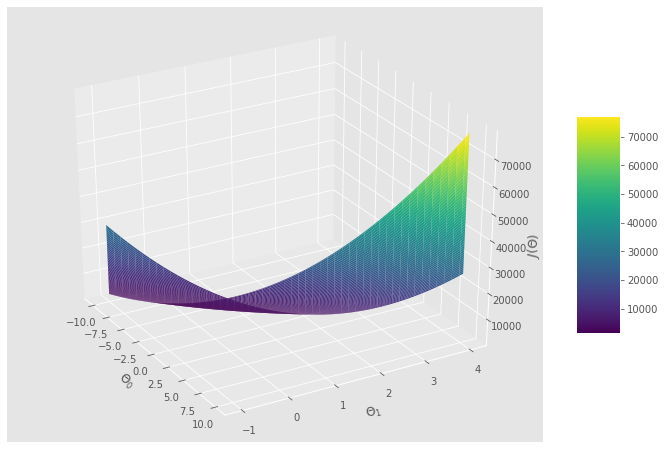

In [82]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$") # $ for Latex
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 330) # 30 - 330 degrees

plt.show()

## Plot the convergence

plot $J(\theta)$ against the number of iterations of gradient descent

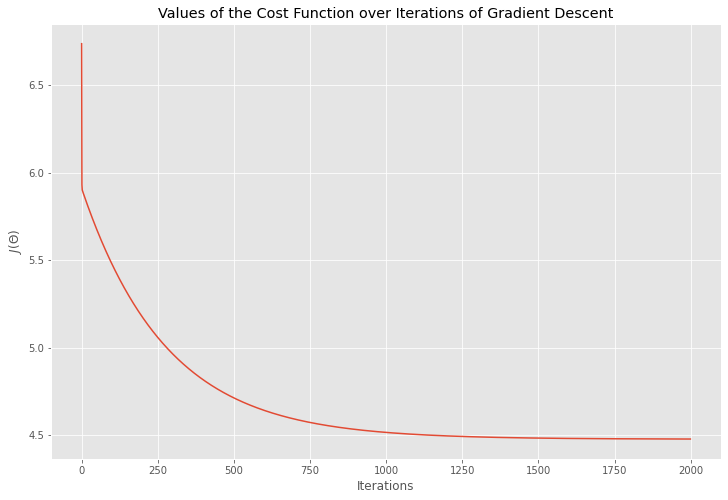

In [84]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Descent");

## Training Data with Linear Regression Fit

In [85]:
theta.shape

(2, 1)

In [86]:
theta

array([[-3.78806857],
       [ 1.18221277]])

In [87]:
theta = np.squeeze(theta)
theta

array([-3.78806857,  1.18221277])

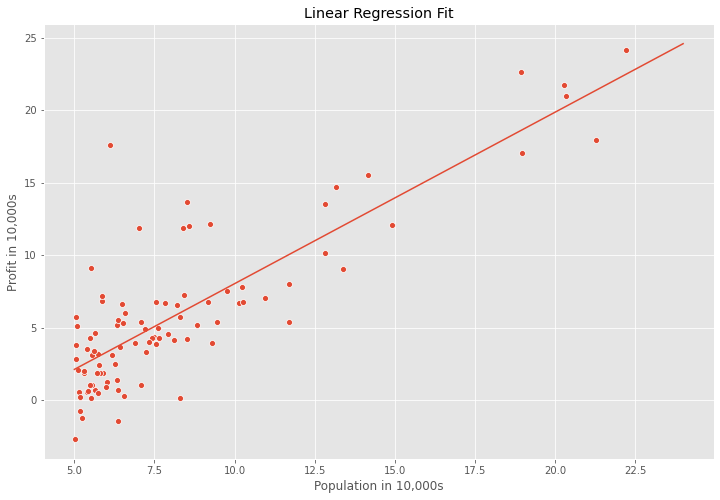

In [91]:
sns.scatterplot(x="Population", y="Profit", data=data)
x_value = [x for x in range(5, 25)] # 5 - 25 * 10,000
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in 10,000s")
plt.title("Linear Regression Fit");

## Iference using the optimized $\theta$ values

$ h_{\theta}(x) = \theta^{T}x $

In [92]:
def predict(x, theta):
  y_pred = np.dot(theta.transpose(), x)
  return y_pred

In [93]:
y_pred_1 = predict(np.array([1,4]), theta) * 10000
print("For a population of 40,000 people, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 40,000 people, the model predicts a profit of $9408.0


In [94]:
y_pred_2 = predict(np.array([1,8.3]), theta) * 10000
print("For a population of 83,000 people, the model predicts a profit of $" + str(round(y_pred_2, 0)))

For a population of 83,000 people, the model predicts a profit of $60243.0
